### Galáxias barradas e interações 

Este notebook possui cálculos para melhor caracterizar galáxias barradas interagindo com um satélite (galáxia anã). Os cálculos aqui apresentados são de: velocidade circular do satélite, órbita do satélite, mapa de alturas... Algumas funções importadas estão escritas em bar_funcs.py

Andressa Wille, 17/04/2023

Aqui estamos usando:

    - Galáxia com 75% de gás relaxado (se transformando em estrelas) e 20% de bojo
    - Galáxia sem gás, com 20% de bojo
    
    +
    
    - Satélite

In [1]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
from scipy import stats
import math
from bar_funcs import *

In [2]:
plt.rc('text', usetex=True)
plt.rcParams['font.size'] = 15

In [3]:
#caminhos
path_nogas = 'bojo20_200/'
path_rel = 'gas75_rel_200/'
paths = [path_nogas, path_rel]

In [4]:
n_snapshots = 201

In [5]:
#arrays para tempo
time_20 = np.empty(n_snapshots)
time_75r = np.empty(n_snapshots)

In [6]:
#arrays para velocidade circular
v_c_disk_75r = r_disk_75r = np.empty(n_snapshots)
v_c_halo_75r = r_halo_75r = np.empty(n_snapshots)
v_c_gas_75r = r_gas_75r = np.empty(n_snapshots)
v_c_star_75r = r_star_75r = np.empty(n_snapshots)
v_c_bulge_75r = r_bulge_75r = np.empty(n_snapshots)

v_c_disk_20 = r_disk_20 = np.empty(n_snapshots)
v_c_halo_20 = r_halo_20 = np.empty(n_snapshots)
v_c_bulge_20 = r_bulge_20 = np.empty(n_snapshots)

In [7]:
#velocidade circular
for p, path in enumerate(paths):
    snapshot = path + f'snapshot_160.hdf5' #8 Gyr

    #ler snapshot
    f = h5py.File(snapshot, 'r')
    
    #ler info disco
    f_disk = f['PartType2']

    x_disk = np.array(f_disk['Coordinates'][:,0])
    y_disk = np.array(f_disk['Coordinates'][:,1])
    z_disk = np.array(f_disk['Coordinates'][:,2])
    m_disk = np.array(f_disk['Masses'])
    
    #ler info halo
    f_halo = f['PartType1']

    x_halo = np.array(f_halo['Coordinates'][:,0])
    y_halo = np.array(f_halo['Coordinates'][:,1])
    z_halo = np.array(f_halo['Coordinates'][:,2])
    m_halo = np.array(f_halo['Masses'])
    
    #corrigir posição
    x_new_disk, y_new_disk, z_new_disk = shift_com(m_disk, x_disk, y_disk, z_disk)
    x_new_halo, y_new_halo, z_new_halo = shift_com(m_halo, x_halo, y_halo, z_halo)
    
    #ler info bojo
    f_bulge = f['PartType3']

    x_bulge = np.array(f_bulge['Coordinates'][:,0])
    y_bulge = np.array(f_bulge['Coordinates'][:,1])
    z_bulge = np.array(f_bulge['Coordinates'][:,2])
    m_bulge = np.array(f_bulge['Masses'])
    
    #corrigir posição
    x_new_bulge, y_new_bulge, z_new_bulge = shift_com(m_bulge, x_bulge, y_bulge, z_bulge)

    #se a galáxia também tem gás e estrelas:
    if p == 1:

        #ler info gas
        f_gas = f['PartType0']

        x_gas = np.array(f_gas['Coordinates'][:,0])
        y_gas = np.array(f_gas['Coordinates'][:,1])
        z_gas = np.array(f_gas['Coordinates'][:,2])
        m_gas = np.array(f_gas['Masses'])
        
        x_new_gas, y_new_gas, z_new_gas = shift_com(m_gas, x_gas, y_gas, z_gas)
        
        #ler info estrelas se o snapshot não for 0
        f_star = f['PartType4']

        x_star = np.array(f_star['Coordinates'][:,0])
        y_star = np.array(f_star['Coordinates'][:,1])
        z_star = np.array(f_star['Coordinates'][:,2])
        m_star = np.array(f_star['Masses'])
        
        #corrigir posição
        x_new_star, y_new_star, z_new_star = shift_com(m_star, x_star, y_star, z_star)
        

    #calcular velocidade circular
    G = 43007.1
    if p == 0:
        v_c_disk_20, r_disk_20, M_r_disk_20 = v_circ_comp(m=m_disk, x=x_new_disk, y=y_new_disk, 
                                                          z=z_new_disk, Rmax=100.0, Nbins=200)
        v_c_halo_20, r_halo_20, M_r_halo_20 = v_circ_comp(m=m_halo, x=x_new_halo, y=y_new_halo, 
                                                     z=z_new_halo, Rmax=100.0, Nbins=200)
        v_c_bulge_20, r_bulge_20, M_r_bulge_20 = v_circ_comp(m=m_bulge, x=x_new_bulge, y=y_new_bulge, 
                                                     z=z_new_bulge, Rmax=100.0, Nbins=200)
        
        M_r_tot_20 = (M_r_disk_20 + M_r_halo_20+M_r_bulge_20)
        v_c_20 = (np.sqrt(G*M_r_tot_20/r_disk_20))
        
    if p == 1:
        v_c_disk_75r, r_disk_75r, M_r_disk_75r = v_circ_comp(m=m_disk, x=x_new_disk, y=y_new_disk, 
                                                          z=z_new_disk, Rmax=100.0, Nbins=200)
        v_c_halo_75r, r_halo_75r, M_r_halo_75r = v_circ_comp(m=m_halo, x=x_new_halo, y=y_new_halo, 
                                                     z=z_new_halo, Rmax=100.0, Nbins=200)
        v_c_bulge_75r, r_bulge_75r, M_r_bulge_75r = v_circ_comp(m=m_bulge, x=x_new_bulge, y=y_new_bulge, 
                                                     z=z_new_bulge, Rmax=100.0, Nbins=200)
        v_c_gas_75r, r_gas_75r, M_r_gas_75r = v_circ_comp(m=m_gas, x=x_new_gas, y=y_new_gas, 
                                                     z=z_new_gas, Rmax=100.0, Nbins=200)
        v_c_star_75r, r_star_75r, M_r_star_75r = v_circ_comp(m=m_star, x=x_new_star, y=y_new_star, z=z_new_star, Rmax=100.0, Nbins=200)
        
        #M_r_tot_75r = (M_r_disk_75r + M_r_halo_75r + M_r_bulge_75r + M_r_gas_75r)
        M_r_tot_75r = (M_r_disk_75r + M_r_halo_75r + M_r_bulge_75r + M_r_gas_75r + M_r_star_75r)
        v_c_75r = (np.sqrt(G*M_r_tot_75r/r_disk_75r))

In [8]:
#mudar para 10 kpc

print('Galáxia não barrada:')
raio10 = np.where(r_disk_75r == 10.0)
vel10 = round(float(v_c_75r[raio10]),2)
print(f'Se r = 12 kpc, v = {vel10} km/s')

raio20 = np.where(r_disk_75r == 20.0)
vel20 = round(float(v_c_75r[raio20]),2)
print(f'Se r = 20 kpc, v = {vel20} km/s')

raio30 = np.where(r_disk_75r == 30.0)
vel30 = round(float(v_c_75r[raio30]),2)
print(f'Se r = 30 kpc, v = {vel30} km/s')

Galáxia não barrada:
Se r = 12 kpc, v = 165.11 km/s
Se r = 20 kpc, v = 171.13 km/s
Se r = 30 kpc, v = 169.21 km/s


In [9]:
print('Galáxia barrada:')
raio10b = np.where(r_disk_20 == 10.0)
vel10b = round(float(v_c_20[raio10b]),2)
print(f'Se r = 10 kpc, v = {vel10b} km/s')

raio20b = np.where(r_disk_20 == 20.0)
vel20b = round(float(v_c_20[raio20b]),2)
print(f'Se r = 20 kpc, v = {vel20b} km/s')

raio30b = np.where(r_disk_20 == 30.0)
vel30b = round(float(v_c_20[raio30b]),2)
print(f'Se r = 30 kpc, v = {vel30b} km/s')

Galáxia barrada:
Se r = 10 kpc, v = 166.2 km/s
Se r = 20 kpc, v = 171.0 km/s
Se r = 30 kpc, v = 168.81 km/s


In [10]:
r = [r_disk_20, r_disk_75r]
v_c_disk = [v_c_disk_20, v_c_disk_75r]
v_c_halo = [v_c_halo_20, v_c_halo_75r]
v_c_bulge = [v_c_bulge_20, v_c_bulge_75r]
v_c_gas = [0, v_c_gas_75r]
v_c_star = [0, v_c_star_75r]
v_c = [v_c_20, v_c_75r]

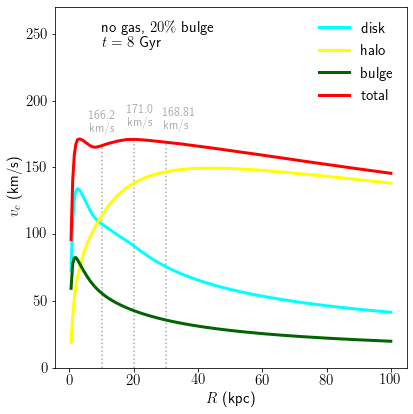

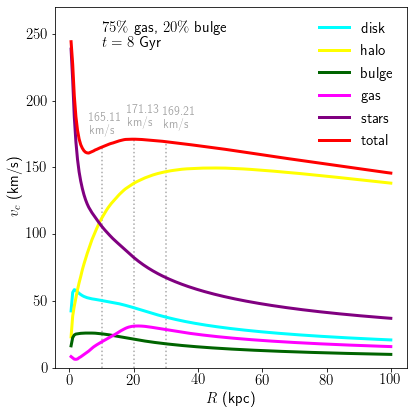

In [11]:
for i in range (0, 2):
    if i == 0:
        plt.figure(figsize=[6,6])
        plt.plot(r[i], v_c_disk[i], color='aqua', lw=3, label='disk')
        plt.plot(r[i], v_c_halo[i], color='yellow', lw=3, label='halo')
        plt.plot(r[i], v_c_bulge[i], color='darkgreen', lw=3, label='bulge')
        plt.plot(r[i], v_c[i], color='red', lw=3, label='total')
        plt.xlabel('$R$ (kpc)', fontsize=15)
        plt.ylabel('$v_c$ (km/s)', fontsize=15)
        plt.legend(frameon=False)
        plt.ylim(0, 270)
    
        text ='no gas, $20\%$ bulge\n $t=8$ Gyr'
        plt.text(10, 240, text, fontsize=15)
        
        plt.vlines(10, 0, vel10b, 'darkgrey', linestyles='dotted')
        plt.annotate(f'{vel10b}\n km/s', xy=(6, vel10b+10), fontsize=12, color='darkgrey')
        plt.vlines(20, 0, vel20b, 'darkgrey', linestyles='dotted')
        plt.annotate(f'{vel20b}\n km/s', xy=(18, vel20b+10), fontsize=12, color='darkgrey')
        plt.vlines(30, 0, vel30b, 'darkgrey', linestyles='dotted')
        plt.annotate(f'{vel30b}\n km/s', xy=(29, vel30b+10), fontsize=12, color='darkgrey')

    if i == 1:
        plt.figure(figsize=[6,6])
        plt.plot(r[i], v_c_disk[i], color='aqua', lw=3, label='disk')
        plt.plot(r[i], v_c_halo[i], color='yellow', lw=3, label='halo')
        plt.plot(r[i], v_c_bulge[i], color='darkgreen', lw=3, label='bulge')
        plt.plot(r[i], v_c_gas[i], color='magenta', lw=3, label='gas')
        plt.plot(r[i], v_c_star[i], color='purple', lw=3, label='stars')
        plt.plot(r[i], v_c[i], color='red', lw=3, label='total')
        plt.xlabel('$R$ (kpc)', fontsize=15)
        plt.ylabel('$v_c$ (km/s)', fontsize=15)
        plt.legend(frameon=False)
        plt.ylim(0, 270)
    
        text ='$75\%$ gas, $20\%$ bulge\n $t=8$ Gyr'
        plt.text(10, 240, text, fontsize=15)
        
        plt.vlines(10, 0, vel10, 'darkgrey', linestyles='dotted')
        plt.annotate(f'{vel10}\n km/s', xy=(6, vel10+10), fontsize=12, color='darkgrey')
        plt.vlines(20, 0, vel20, 'darkgrey', linestyles='dotted')
        plt.annotate(f'{vel20}\n km/s', xy=(18, vel20+10), fontsize=12, color='darkgrey')
        plt.vlines(30, 0, vel30, 'darkgrey', linestyles='dotted')
        plt.annotate(f'{vel30}\n km/s', xy=(29, vel30+10), fontsize=12, color='darkgrey')

    
    plt.tight_layout()
    plt.savefig(f'vc_sat{i}.png')

concentração e comprimento de escala

In [6]:
M = 1e10 #Msun
h = 0.7

In [7]:
c = (6.71/(1)**(0.44))*(M/(2*(10**12)*(h**(-1))))**(-0.091)
print(c)

11.225671472750152


In [8]:
rho = 2.77 * (h**2) * 1e11 #Msun/Mpc³ 

In [9]:
r_3 = M * (3/(4*np.pi)) * (1/(200*rho))
r_200 = r_3 ** (1/3)
print(r_200) #Mpc

0.044470141907161954


In [10]:
rs = r_200/c
print(rs) #Mpc

0.003961468319744735


In [11]:
a_h = rs * np.sqrt(2*(np.log(1+c)-(c/(c+1)))) #Mpc
a_h = a_h * 1000
print(a_h) #kpc

7.053934829645223


In [15]:
#caminhos
path = 'satelite/b8_sat0.1_30/'
paths = [path]

In [16]:
n_snapshots = 31

órbita

In [17]:
cm_x = np.empty(n_snapshots)
cm_y = np.empty(n_snapshots)
cm_z = np.empty(n_snapshots)

In [18]:
for p, path in enumerate(paths):
    snapshot = path + 'snapshot_030.hdf5'

    #ler snapshot
    f = h5py.File(snapshot, 'r')

    #ler info disco
    f_disk = f['PartType2']

    x_disk = np.array(f_disk['Coordinates'][:,0])
    y_disk = np.array(f_disk['Coordinates'][:,1])
    z_disk = np.array(f_disk['Coordinates'][:,2])
        
    for j in range (0, n_snapshots):
        index = str(j).zfill(3)
        snapshot = path + f'snapshot_{index}.hdf5'

        #ler snapshot
        f = h5py.File(snapshot, 'r')
        
        #ler info satélite
        f_bndry = f['PartType5']

        x_bndry = np.array(f_bndry['Coordinates'][:,0])
        y_bndry = np.array(f_bndry['Coordinates'][:,1])
        z_bndry = np.array(f_bndry['Coordinates'][:,2])
        m_bndry = np.array(f_bndry['Masses'])

        t = round(f['Header'].attrs['Time'], 2)
            
        cm_x[j] = sum(m_bndry*x_bndry)/sum(m_bndry)
        cm_y[j] = sum(m_bndry*y_bndry)/sum(m_bndry)
        cm_z[j] = sum(m_bndry*z_bndry)/sum(m_bndry)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


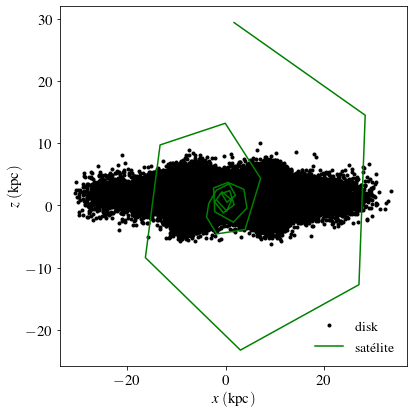

In [19]:
plt.figure(figsize=[6,6])
plt.plot(y_disk, z_disk, 'k.', label='disk')
plt.plot(cm_y, cm_z, 'g-', label='satélite')
plt.xlabel(r'$x~({\rm kpc})$', fontsize=15)
plt.ylabel(r'$z~({\rm kpc})$', fontsize=15)
plt.legend(loc='lower right', frameon=False, fontsize=14)
plt.tight_layout()
#plt.savefig('orbita.png')

mapa de alturas

/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:93: MatplotlibDeprecationWarning: Calling add_axes() without argument is deprecated since 3.3 and will be removed two minor releases later. You may want to use add_subplot() instead.


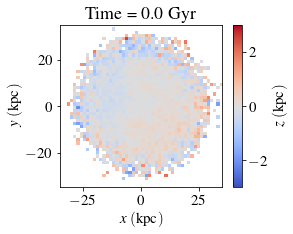

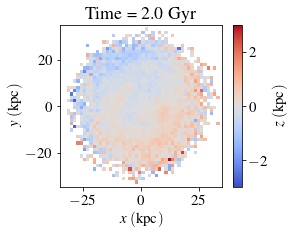

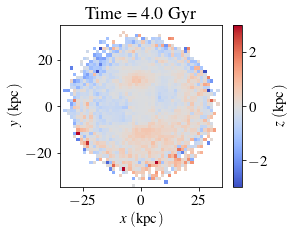

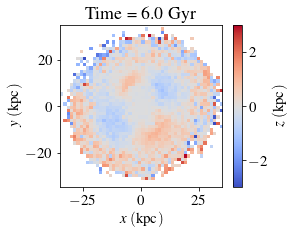

In [24]:
plt.rc('text',usetex=True)
plt.rc('font',**{'family':'serif','serif':['Times']})

for p, path in enumerate(paths):
    for j in range (0, n_snapshots,10):
        index = str(j).zfill(3)
        snapshot = path + f'snapshot_{index}.hdf5'

        #ler snapshot
        f = h5py.File(snapshot, 'r')

        #ler info disco
        f_disk = f['PartType2']

        x_disk = np.array(f_disk['Coordinates'][:,0])
        y_disk = np.array(f_disk['Coordinates'][:,1])
        z_disk = np.array(f_disk['Coordinates'][:,2])
        vx_disk = np.array(f_disk['Velocities'][:,0])
        vy_disk = np.array(f_disk['Velocities'][:,1])
        vz_disk = np.array(f_disk['Velocities'][:,2])
        m_disk = np.array(f_disk['Masses'])
        Ndisk = np.array(f_disk['ParticleIDs'])

        t = round(f['Header'].attrs['Time'], 2)
        
        #corrigir posição - centro de massa
        x_new_disk, y_new_disk, z_new_disk = shift_com(m_disk, x_disk, y_disk, z_disk)
        
        
        #corrigir posição - momento angular
        Ltot = [0, 0, 0]
        #m_disk = m_disk * 1e10
        Ndisk = 25
        
        for k in range (0, Ndisk):
            R = [(x_new_disk[k]), (y_new_disk[k]), (z_new_disk[k])]
            px = (m_disk[k] * vx_disk[k])
            py = (m_disk[k] * vy_disk[k])
            pz = (m_disk[k] * vz_disk[k])
            p = [px, py, pz]
            L = np.cross(R, p)
            Ltot = Ltot + L

        vetorZ = np.array([0, 0, 1])
        produto_interno = (Ltot[0] * vetorZ[0]) + (Ltot[1] * vetorZ[1]) + (Ltot[2] * vetorZ[2])
        produto_normas = ((Ltot[0]**2 + Ltot[1]**2 + Ltot[2]**2)**0.5) * ((vetorZ[0]**2 + vetorZ[1]**2 + vetorZ[2]**2)**0.5)
        cos_phi = produto_interno/produto_normas
        phi = math.acos(cos_phi)

        for k in range (0, Ndisk):
            xnew = np.sin(phi)*z_new_disk[k] + np.cos(phi)*x_new_disk[k]
            znew = (-1) * np.cos(phi)*z_new_disk[k] + np.sin(phi)*x_new_disk[k]
            x_new_disk[k] = xnew
            z_new_disk[k] = mean(znew)
        

        #mapa de alturas
        Nbins = 50

        Rmax  =  35.0 #kpc
        xmin  = -Rmax
        xmax  =  Rmax
        ymin  = -Rmax
        ymax  =  Rmax

        results, xb, yb, binnum = stats.binned_statistic_2d(x_new_disk, y_new_disk, z_new_disk, 
                                        statistic='mean', bins=Nbins, range=[[xmin,xmax],[ymin,ymax]])

        extent = [xb[0], xb[-1], yb[0], yb[-1]]

        Q = results

        Qmin = -3
        Qmax = 3

        #figura
        fig = plt.figure()
        ax1 = plt.subplot(111)

        fig.set_size_inches(4.5,3.5)

        #color map
        im = plt.imshow(Q.T, extent=extent, origin='lower', cmap="coolwarm", interpolation='nearest',
                        vmin=Qmin, vmax=Qmax)

        plt.xlim(xmin, xmax)
        plt.ylim(ymin, ymax)
        ax1.set_aspect('equal')

        time = t
        ax1.set_title(f'Time = {time} Gyr')

        cb = fig.add_axes()
        cb = fig.colorbar(im, cax=cb, orientation="vertical")
        cb.set_label(r'$z~({\rm kpc})$')

        ax1.set_xlabel(r'$x~({\rm kpc})$')
        ax1.set_ylabel(r'$y~({\rm kpc})$')

        plt.tight_layout()
        #plt.savefig(f'mapZ_{index}.png')